In [1]:
#coding=utf-8
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

/Users/yixin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
np.__version__

'1.14.0'

### load data

In [3]:
def get_multi_data():
    x = np.array([
        [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
        [4, 5, 5, 4, 4, 4, 5, 5, 6, 6, 6, 5, 5, 6, 6]
    ])

    x = x.T
    
    y = np.array([-1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1])
    return x, y

In [13]:
x

array([[1, 4],
       [1, 5],
       [1, 5],
       [1, 4],
       [1, 4],
       [2, 4],
       [2, 5],
       [2, 5],
       [2, 6],
       [2, 6],
       [3, 6],
       [3, 5],
       [3, 5],
       [3, 6],
       [3, 6]])

In [14]:
for k, v in enumerate(x.T):
    print k, v

0 [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
1 [4 5 5 4 4 4 5 5 6 6 6 5 5 6 6]


In [50]:
class NaiveBayes(object):
    def __init__(self):
        self.y_class = {}
        self.y_x_prob = {}
        
    def fit(self, X, y):
        self.cal_y_prob(y)
        self.cal_x_prob(X, y)
        
    def cal_y_prob(self, y):
        """
        cal each class's prior probability
        """
        n_samples = len(y) * 1.0
        
        classes, count = np.unique(y, return_counts=True)
        
        for k, v in zip(classes, count):
            self.y_class[k] = v / n_samples
            
    def cal_x_prob(self, X, y):
        """
        cal p(x|yi)
        """
        
        y_class = np.unique(y)
        
        for i in y_class:
            self.y_x_prob[i] = {}
            
            idxs = np.where(y==i)[0]
            
            for k, v in enumerate(X.T):
                xk_prob = {}

                for idx in idxs:
                    xk_prob[v[idx]] = xk_prob.get(v[idx], 0) + 1
                    
                for j in xk_prob:
                    xk_prob[j] = xk_prob[j] * 1.0 / len(idxs)
                    
                self.y_x_prob[i][k] = xk_prob
    
    def predict_once(self, x):
        ans = {}
        
        for i in self.y_class:
            y_prob = self.y_class[i]
            
            for k, v in enumerate(x):
                y_prob *= self.y_x_prob[i][k][v]
            
            ans[i] = y_prob
        
        return np.array(ans)
    
    def predict(self, x):
        if x.ndim == 1:
            return self.predict_once(x)
        else:
            pres = []
            for i in xrange(x.shape[0]):
                pres.append(self.predict_once(x[i]))
            return np.array(pres)[:, np.newaxis]
        
    def get_x_prob(self):
        return self.y_x_prob
    
    def get_y_prob(self):
        return self.y_class
        

In [23]:
X, y = get_multi_data()

In [51]:
nb = NaiveBayes()

In [52]:
nb.fit(X,y)

In [58]:
test = np.array([[2,4], [1,5]])
nb.predict(test)

array([[array({1: 0.02222222222222222, -1: 0.06666666666666667}, dtype=object)],
       [array({1: 0.059259259259259255, -1: 0.06666666666666667}, dtype=object)]],
      dtype=object)

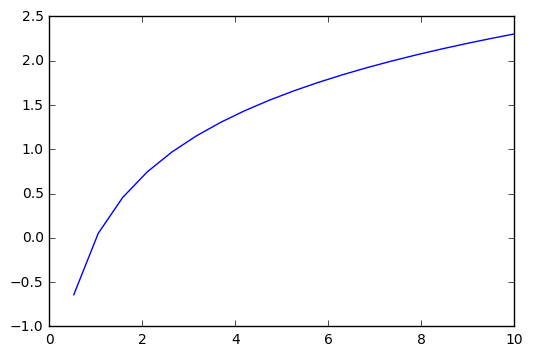

In [64]:
a = np.linspace(0, 10, 20)

plt.plot(a, np.log(a) )
plt.show()

In [36]:
class NaiveBayes(object):
    def __init__(self):
        self.y_classes = {}
        self.y_x = {}
        
    def fit(self, x, y):
        self.get_y_classes(y)
        self.get_y_x_classes(x, y)
        
    def get_y_classes(self, y):
        classes, nums = np.unique(y, return_counts=True)
        n_samples = len(y) * 1.0
        
        for k, v in zip(classes, nums):
            self.y_classes[k] = v / n_samples
            
    def get_y_x_classes(self, x, y):
        for label in self.y_classes.keys():
            self.y_x[label] = {}
            idxs = np.where(y==label)[0]
            
            for k, v in enumerate(x.T):
#                 print k, v
                tmp = {}
                
                for idx in idxs:
                    tmp[v[idx]] = tmp.get(v[idx], 0) + 1
                    
                for j in tmp:
                    tmp[j] = tmp[j] * 1.0 / len(idxs)
                
                self.y_x[label][k] = tmp
    
    def predict_once(self, x):
        
        ans = {}
        
        for label in self.y_classes:
            tmp = self.y_classes[label]
            
            for k, v in enumerate(x):
                tmp *= self.y_x[label][k][v]
            ans[label] = tmp
        return np.array(ans)
    
    def predict(self, x):
        pres = []
        for v in x:
            pres.append(self.predict_once(v))
        
        return np.array(pres)[:, np.newaxis]
        
        

In [37]:
nb = NaiveBayes()

In [38]:
nb.fit(X,y)

In [39]:
test = np.array([[2,4], [1,5]])
nb.predict(test)

array([[array({1: 0.02222222222222222, -1: 0.06666666666666667}, dtype=object)],
       [array({1: 0.059259259259259255, -1: 0.06666666666666667}, dtype=object)]],
      dtype=object)

In [48]:
class NaiveBayes(object):
    def __init__(self):
        self.y = {}
        self.y_x = {}
        
    def fit(self, x, y):
        self.get_y_pre(y)
        self.get_y_x_pre(x, y)
        
    def get_y_pre(self, y):
        n_classes, n_nums = np.unique(y, return_counts=True)
        n_samples = len(y) * 1.0
        for k, v in zip(n_classes, n_nums):
            self.y[k] = v / n_samples
    
    def get_y_x_pre(self, x, y):
        for k in self.y.keys():
            self.y_x[k] = {}
            
            idxs = np.where(y==k)[0]
            
            for i, j in enumerate(x.T):
                tmp = {}
                for idx in idxs:
                    tmp[j[idx]] = tmp.get(j[idx], 0) + 1
                
                nums = len(idxs) * 1.0
                for v in tmp:
                    tmp[v] /= nums
                
                self.y_x[k][i] = tmp
    
    def predict_once(self, x):
        ans = {}
        for label in self.y:
            pre = self.y[label]
            
            for v in range(len(x)):
                pre *= self.y_x[label][v][x[v]]
            
            ans[label] = pre
            
        return ans
    
    def predict(self, x):
        return np.array([self.predict_once(v) for v in x])#[:, np.newaxis]
            
            
            

In [49]:
nb = NaiveBayes()
nb.fit(X,y)
test = np.array([[2,4], [1,5]])
nb.predict(test)

array([{1: 0.02222222222222222, -1: 0.06666666666666667},
       {1: 0.059259259259259255, -1: 0.06666666666666667}], dtype=object)